In [209]:
import pandas as pd
import pickle,os, copy
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
import sys
import scipy

import re

from sklearn.cluster import DBSCAN


import margin_flatness as mf
import margin_flatness.postprocessing as mf_post


%load_ext autoreload
%autoreload 2

plt.rcParams["figure.figsize"] = (13,9)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [210]:
root_folder = os.environ["PATH_TO_DEEP_FOLDER"]
data_name = "MNIST"
exp = "CE_F1"
experiment_folder = os.path.join(root_folder, "experiments", data_name, exp)

In [211]:
stats_df = mf_post.stats_plotting.get_end_stats(experiment_folder, step=-1)


TypeError: load_cached_data() missing 2 required positional arguments: 'step' and 'time_stamp'

# Correlations Config

#### Possible Complexity Measures:

Flatness: ["Hessian Trace"]
Robustness: ["Output Margins", "Softmax Margins", "InputOutputJacobian", "ACEHT", "ACEHT Margins"]

#### Possible Correlations 
Kendal, Pearsons

In [232]:
# X_axis_name = "Output Margins"
X_measure_name = "sample_average_flatness_pointwise"
Y_measure_name = "point_traces"

step = -1
seed = 0
num_datapoints = 1000
on_test_set = False
device = None

correlation_type = "kendall"

In [233]:
cfgs = mf.save_load.load_configs(experiment_folder)

In [234]:
from scipy.stats import linregress, kendalltau, spearmanr


In [235]:
X_measure = mf_post.postprocess_experiment.compute_on_experiment(experiment_folder, X_measure_name, step, seed, num_datapoints, on_test_set, device, verbose=True)
Y_measure = mf_post.postprocess_experiment.compute_on_experiment(experiment_folder, Y_measure_name, step, seed, num_datapoints, on_test_set, device, verbose=True)

corrs = []
for exp_id in cfgs.index:
    for nn in X_measure[exp_id]:
        corr = spearmanr(X_measure[exp_id][nn], Y_measure[exp_id][nn])
        corrs.append(corr[0])
    

(array([ 3.,  0.,  4.,  8., 15., 18., 18., 11.,  2.,  2.]),
 array([-0.34133371, -0.29404214, -0.24675057, -0.199459  , -0.15216743,
        -0.10487586, -0.05758429, -0.01029272,  0.03699885,  0.08429042,
         0.13158199]),
 <BarContainer object of 10 artists>)

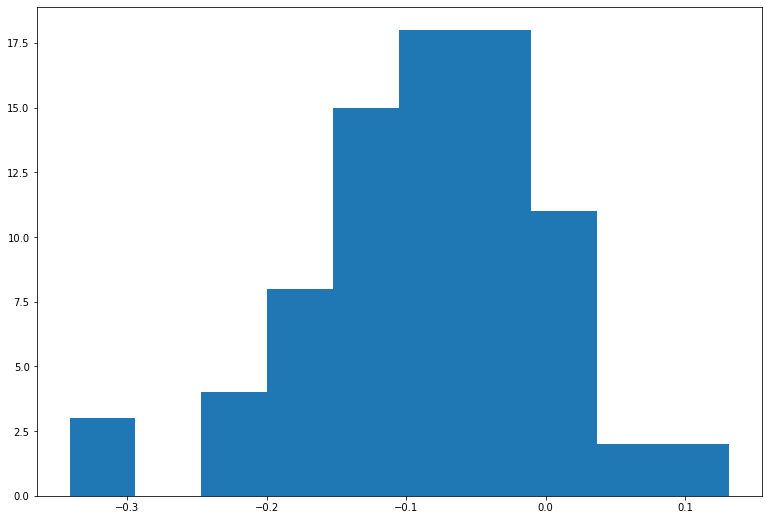

In [236]:
plt.hist(corrs)

(array([ 5.,  2.,  3.,  5.,  1.,  2.,  0.,  1., 18., 44.]),
 array([0.2822674 , 0.33930506, 0.39634273, 0.45338039, 0.51041806,
        0.56745573, 0.62449339, 0.68153106, 0.73856872, 0.79560639,
        0.85264405]),
 <BarContainer object of 10 artists>)

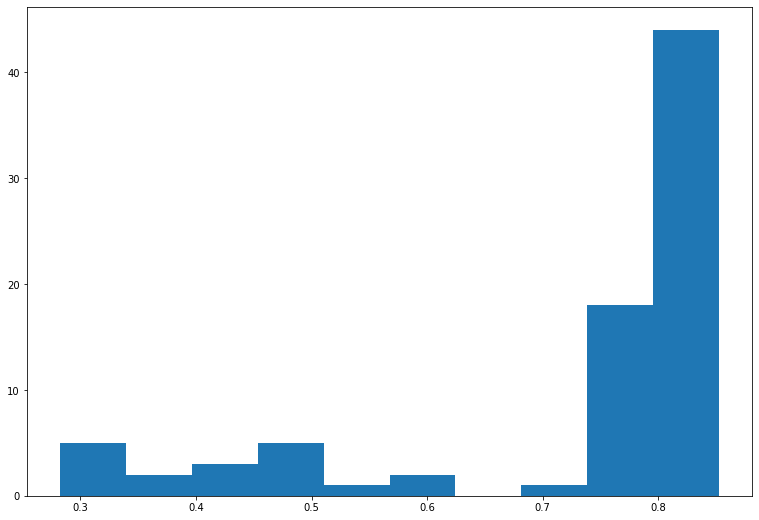

In [196]:
plt.hist(corrs)